In [1]:
#Building Pipelines.
#Automates steps, especially those that are universaly used. 
#Includes things like - dealing with missing values, standardizing independent values, feature engineering



In [2]:
#Importing Breast Cancer Data from UCI repo
# First column is the 'target'. 2 classes -> Benign and Malignant

import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
    header=None
)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
from sklearn.preprocessing import LabelEncoder

X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

le = LabelEncoder()

# Transforming 'M' and 'B' into zeroes and ones
y = le.fit_transform(y)

le.classes_

le.transform(['M', 'B'])

array([1, 0])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

#make pipeline: can add as many transformers as we want. Transformers -> support fit and transform methods
#make_pipeline: also supports predict, if the last transformer is an estimator. 
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression())

pipe_lr.fit(X_train, y_train)

y_pred = pipe_lr.predict(X_test)

pipe_lr.score(X_test, y_test)

0.956140350877193

In [7]:
(y_pred == y_test).sum()/len(y_test)

0.956140350877193

In [8]:
#Cross-validation techniques. 
# Holdout: we further part the training set into training and validation
# training -> fit the model(s)
# Validation -> best performing model on the validation set is used
# Once the model is seleted, we test it on test dataset

# K-fold cross-validation
# Split the training dataset into k-folds without replacement (row can not be seleted twice)
# The k-1 folds are used for training, and the kth aka the test fold is used to evaluate performace
# this performamce is repeated k times, ie the test fold is shifted to another fold
# The performace is averaged
# Once a good model is found -> again train on the whole training dataset, and test it on the test dataset
# When working with large datasets -> less k-folds. When working with small dataset -> more k-folds
# stratified k-fold -> the proportion of 


In [9]:
import numpy as np

from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print(np.format_float_positional(score, precision=3))
    

0.935
0.935
0.957
0.957
0.935
0.956
0.978
0.933
0.956
0.956


In [10]:
sum(scores)/len(scores)

0.9495169082125605

In [11]:
# In built k-cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr, X = X_train, y = y_train, cv = 10, n_jobs = 1)

#n_jobs -> how many CPU's to employ. -1, employs all

In [12]:
sum(scores)/len(scores)

0.9495169082125605

In [13]:
#Debugging Algorithms through learning and validation curves

# Learning Algo -> is there problem with over-fitting/under-fitting. 
# Validation curves -> issues with learning algo

In [14]:
# High Variance -> over fitting
# High Bias -> under fitting

# Ideally, want the training accuracy and validation accuracy converge with the desired accuracy as sample size
# is increased

# High bias -> increase number of features, or if using feature extraction, increase the feature dimension. 
# High variance -> decrease number of features

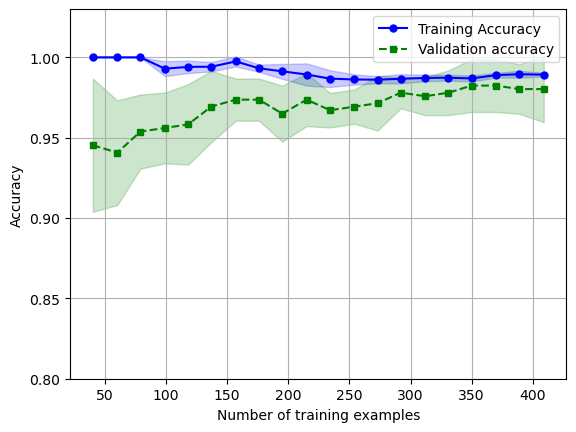

In [15]:
# Learning curve function in scikit

import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', max_iter=10000))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X = X_train, y = y_train, 
                                                       train_sizes=np.linspace(0.1, 1.0, 20), cv = 10, 
                                                        n_jobs = 1)
#train_sizes=np.linspace(0.1, 1.0, 10) -> 10 evenly spaced, relative intervals
# cv is number of k

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize=5, label = 'Training Accuracy')

plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.2, color = 'blue')

plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize=5, 
         label = 'Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.2, color = 'green')

plt.grid()
plt.legend(loc = 'best')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.03])
plt.show()

In [16]:
# As training examples increase, training accuracy and validation accuracy converge

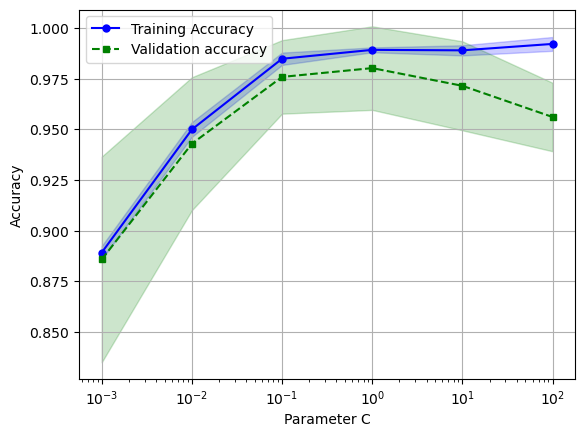

In [17]:
# Addressing over and under fitting with validation curves

from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y = y_train,
                                             param_name='logisticregression__C', param_range = param_range, cv=10)

train_mean = np.mean(train_scores, axis = 1) #Along a row
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(param_range, train_mean, color = 'blue', marker = 'o', markersize=5, label = 'Training Accuracy')

plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha = 0.2, color = 'blue')

plt.plot(param_range, test_mean, color = 'green', linestyle = '--', marker = 's', markersize=5, 
         label = 'Validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha = 0.2, color = 'green')

plt.grid()
plt.xscale('log')
plt.legend(loc = 'best')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.show()

In [18]:
#Training score and validation score are closest to each other when c is between 0.01 and 1. 
# Large value of c -> overfits, as training accuracy significantly higher than validation accurcy
# C is the inverse regularization parameter

In [19]:
#HyperParameters -> Parameters that are optimized seperately for a learning algorithm

# Grid-search -> optimal combination of hyperparamter values



In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
              'svc__kernel': ['linear']},
              {'svc__C': param_range,
              'svc__gamma': param_range,
              'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv = 10,
                 refit = True,
                 n_jobs=-1)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)

0.9846859903381642


In [22]:
print(gs.best_params_)

{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [ ]:
# Linear SVM, used C
# rbf SVM, used gamma and kernel
# cv = 10; used k-fold validation with 10 folds

In [23]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9736842105263158


In [ ]:
#Grid Search is exhaustive, as it tries all combinations, contained in the grid, and will find the optimum solution
# within the grid
# Doing random search results in more expansive testing

In [24]:
import scipy.stats
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_range = scipy.stats.loguniform(0.0001, 1000.0)

In [25]:
np.random.seed(1)

param_range.rvs(10)

array([8.30145146e-02, 1.10222804e+01, 1.00184520e-04, 1.30715777e-02,
       1.06485687e-03, 4.42965766e-04, 2.01289666e-03, 2.62376594e-02,
       5.98924832e-02, 5.91176467e-01])

In [27]:
from sklearn.model_selection import RandomizedSearchCV

pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=1))

param_grid = [
    {'svc__C':param_range,
    'svc__kernel':['linear']},
    {'svc__C': param_range,
    'svc__gamma':param_range,
    'svc__kernel':['rbf']}
]

rs = RandomizedSearchCV(estimator=pipe_svc, param_distributions=param_grid, scoring='accuracy', 
                       refit = True, n_iter = 20, cv = 10, random_state=1, n_jobs=-1)

rs = rs.fit(X_train, y_train)
print(rs.best_score_)

0.9780676328502416


In [28]:
print(rs.best_params_)

{'svc__C': 0.05971247755848464, 'svc__kernel': 'linear'}


In [33]:
from sklearn.experimental import enable_halving_search_cv

from sklearn.model_selection import HalvingRandomSearchCV

hsLinear = HalvingRandomSearchCV(pipe_svc, param_distributions=param_grid[0], n_candidates='exhaust', 
                          resource='n_samples', factor=1.5, random_state=1, n_jobs=-1)

hsNonLinear = HalvingRandomSearchCV(pipe_svc, param_distributions=param_grid[1], n_candidates='exhaust', 
                          resource='n_samples', factor=1.5, random_state=1, n_jobs=-1)

In [36]:
hsLinear.fit(X_train, y_train)
print(hsLinear.best_score_, hsLinear.best_params_)

0.9617647058823529 {'svc__C': 0.5911764673828895, 'svc__kernel': 'linear'}


In [38]:
hsNonLinear.fit(X_train, y_train)
print(hsNonLinear.best_score_, hsNonLinear.best_params_)

0.9676470588235293 {'svc__C': 6.968507914890267, 'svc__gamma': 0.016166254707399786, 'svc__kernel': 'rbf'}


In [ ]:
#Algorithm Selection with nested cross-validation
# 2-loops: outer loop splits the data into k-folds, and inner loop uses different hyperparameter


In [48]:
param_range = [10.0**i for i in range(-4, 4)]

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                   param_grid=param_grid,
                   scoring='accuracy',
                   cv=2)
scores = cross_val_score(gs, X_train, y_train,
                          scoring='accuracy', cv=5)

In [49]:
print(np.mean(scores), np.std(scores))

0.9736263736263737 0.014906219743132467


In [50]:
# Using nested cross-validation approach to compare SVM and Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1), 
                 param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                 scoring = 'accuracy',
                 cv = 2)

scores = cross_val_score(gs, X_train, y_train, scoring = 'accuracy', cv = 5)

print(np.mean(scores), np.std(scores))

0.9384615384615385 0.016446845656149216


In [51]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)

confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)

In [52]:
print(confmat)

[[71  1]
 [ 2 40]]


In [ ]:
#Error (ERR)
# False prediction/number of predictions

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

pre_val = precision_score(y_true = y_test, y_pred = y_pred)
rec_val = recall_score(y_true = y_test, y_pred=y_pred)
f1_val = f1_score(y_true=y_test, y_pred=y_pred)
mcc_val = matthews_corrcoef(y_true = y_test, y_pred = y_pred)

print(pre_val, rec_val, f1_val, mcc_val)

0.975609756097561 0.9523809523809523 0.963855421686747 0.9433397594898876


In [54]:
from sklearn.metrics import make_scorer

c_gamma_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'svc__C': c_gamma_range, 
              'svc__kernel': ['linear']},
             {'svc__C': c_gamma_range,
             'svc__gamma': c_gamma_range,
             'svc__kernel': ['rbf']}]

scorer = make_scorer(f1_score, pos_label = 0)

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring = scorer, cv = 10)

gs = gs.fit(X_train, y_train)

In [55]:
print(gs.best_score_, gs.best_params_)

0.9861994953378878 {'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [ ]:
#Reciever Operating Characteristic graphs -> select models based on FPR and TPR

In [ ]:
from sklearn.metrics import roc_curve, auc

from numpy import interp

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(penalty='l2', 
                                                                                  solver='l',
                                                                                  random_state=1))
X_train2 = X_train[:, [4,14]]

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig 